In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format



In [2]:
cancer_data =pd.read_csv(('C:\\Users\\david\Desktop\\thinkful datasets\\breast-cancer-wisconsin.csv'))

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?



In [3]:
cancer_data.head()

,sample_no,clump,cell_size,cell_shape,marg_adhesion,single_e_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitosises,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cancer_data.columns

Index(['sample_no', 'clump', 'cell_size', 'cell_shape', 'marg_adhesion',
       'single_e_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nuclei',
       'mitosises', 'class'],
      dtype='object')

In [5]:
cancer_data.describe()

,sample_no,clump,cell_size,cell_shape,marg_adhesion,single_e_cell_size,bland_chrom,norm_nuclei,mitosises,class
count,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000
mean,1071704.099,4.418,3.134,3.207,2.807,3.216,3.438,2.867,1.589,2.690
std,617095.730,2.816,3.051,2.972,2.855,2.214,2.438,3.054,1.715,0.951
min,61634.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,870688.500,2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000,2.000
50%,1171710.000,4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000,2.000
75%,1238298.000,6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000,4.000
max,13454352.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


In [6]:
#bare nuclei didn't show up? Why??

cancer_data.dtypes

sample_no              int64
clump                  int64
cell_size              int64
cell_shape             int64
marg_adhesion          int64
single_e_cell_size     int64
bare_nuclei           object
bland_chrom            int64
norm_nuclei            int64
mitosises              int64
class                  int64
dtype: object

In [7]:
print(cancer_data.bare_nuclei.unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [8]:
# "?" in data
cancer_data = cancer_data.drop(cancer_data[cancer_data.bare_nuclei == '?'].index)

In [9]:
#convert column back to int
cancer_data["bare_nuclei"] = pd.to_numeric(cancer_data["bare_nuclei"])

In [10]:
cancer_data.dtypes

sample_no             int64
clump                 int64
cell_size             int64
cell_shape            int64
marg_adhesion         int64
single_e_cell_size    int64
bare_nuclei           int64
bland_chrom           int64
norm_nuclei           int64
mitosises             int64
class                 int64
dtype: object

In [11]:
#convert class column to binary
cancer_data['class'] = np.where(cancer_data['class']== 4, 1, 0)

In [12]:
cancer_data.describe()

,sample_no,clump,cell_size,cell_shape,marg_adhesion,single_e_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitosises,class
count,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000
mean,1076720.227,4.442,3.151,3.215,2.830,3.234,3.545,3.445,2.870,1.603,0.350
std,620644.048,2.821,3.065,2.989,2.865,2.223,3.644,2.450,3.053,1.733,0.477
min,63375.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
25%,877617.000,2.000,1.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,0.000
50%,1171795.000,4.000,1.000,1.000,1.000,2.000,1.000,3.000,1.000,1.000,0.000
75%,1238705.000,6.000,5.000,5.000,4.000,4.000,6.000,5.000,4.000,1.000,1.000
max,13454352.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000


In [13]:
cancer_data.drop(['sample_no'], 1)

,clump,cell_size,cell_shape,marg_adhesion,single_e_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitosises,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [14]:
y_train = cancer_data['class']
X_train = cancer_data.loc[:, ~cancer_data.columns.isin(['class', 'sample_no'])]

In [15]:
X_train

,clump,cell_size,cell_shape,marg_adhesion,single_e_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitosises
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.20)

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Build our model.


neighbors  = KNeighborsClassifier(n_neighbors=5)

neighbors.fit(X_train,y_train)

neighbors.score(X_train,y_train)


# Classify, storing the result in a new variable.
y_pred_train = neighbors.predict(X_train)
y_pred_test = neighbors.predict(X_test)


cv_knn = cross_val_score(neighbors, X_train, y_train, cv=5)


print(cv_knn)
print("mean = {:.5}".format(cv_knn.mean()))





[0.96363636 0.96330275 0.95412844 0.99082569 0.95412844]
mean = 0.9652


## Random Forest classifier

In [18]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score


rfc1 = ensemble.RandomForestClassifier(random_state=42)
rfc1.fit(X_train,y_train)
cv1 = cross_val_score(rfc1, X_train, y_train, cv=5)



#Test
y_true, y_pred = y_test, rfc1.predict(X_test)

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv1))
print("mean = {:.3}".format(cv1.mean()))


Test Set score = 0.934 
Training set Cross validation = [0.95454545 0.95412844 0.94495413 0.98165138 0.96330275]
mean = 0.96


In [19]:
#Creating a dataframe to examine the tresholds need to run new RFCs

feature_importances = pd.DataFrame(rfc1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

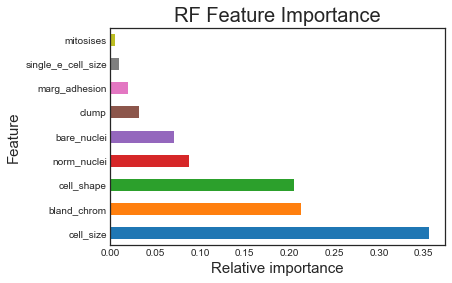

In [20]:
feature_graph = feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("RF Feature Importance", fontsize=20)
feature_graph.plot.barh()

It looks like cell size is the most important feature according to Random Forest

## Let's try this with GBM

In [21]:

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'random_state': 42,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)


clf_cv = cross_val_score(clf, X_train, y_train, cv=5)


#Test
y_true, y_pred = y_test, clf.predict(X_test)

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(clf_cv))
print("mean = {:.3}".format(clf_cv.mean()))

Test Set score = 0.956 
Training set Cross validation = [0.94545455 0.95412844 0.95412844 0.98165138 0.96330275]
mean = 0.96


In [22]:
#Creating a dataframe to examine the tresholds need to run new RFCs

GB_feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

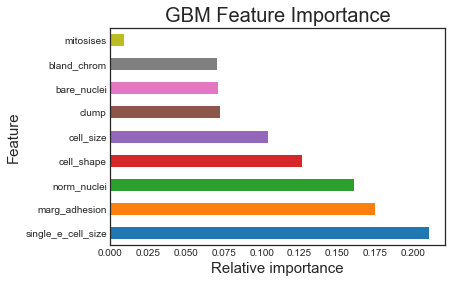

In [23]:
GB_feature_graph = GB_feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("GBM Feature Importance", fontsize=20)
GB_feature_graph.plot.barh()